# PRCP-1018-Bike Rental

# Project team's ID : PTID-CDS-MAY-23-1520

Problem Statement
Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.

Dataset Information:
This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

Buisness case:To predict daily bike rental count based on the environmental and seasonal settings

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# To Avoid Warnings
import warnings

warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r"C:\Users\alanj\Downloads\PRCP-1018-BikeRental\Data\day.csv")

In [5]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data.info()# To check  data type and  non null value of all columns  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


***observation:
     There are no null values and every features are in numerical that is no categorical datas present***

In [7]:
data["season"].unique()    # unique value in  season

array([1, 2, 3, 4], dtype=int64)

In [8]:
data["weekday"].unique()    # unique value in  weekday

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [9]:
data["workingday"].unique()    # unique value in  workingday

array([0, 1], dtype=int64)

In [10]:
data["weathersit"].value_counts()    # valuecounts in  weathersit

1    463
2    247
3     21
Name: weathersit, dtype: int64

# Domain Analysis


Although bike sharing is a relatively new form of transport in urban areas, it has become increasingly popular in towns and cities around the world in recent years. Bike sharing is an oriented production service system (PSS) where ownership of the bike is retained by the provider, who sells the functions of the bike,via modified distribution and payment systems. This popularity can be mainly explained by the fact that bikesharing programmes are associated with various social, environmental,seasonal and economic benefits, such as a decrease in carbon dioxide (CO2) emissions, a reduction in various diseases (e.g., diabetes and obesity), and a decline in traffic congestion and noise pollution through the provision of alternatives to auto-commuting and an increase in public transit useinstant.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

The features used in this data are:

dteday : date

season : 1:spring 2:summer 3:fall 4:winter

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are divided to 41 (max)

atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [12]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc. 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## insights:


1. The dataset contains information about bike rentals on an hourly basis for a period of 731 days.
2. The average number of rentals per hour is 4504.35, with a standard deviation of 1937.21, indicating a significant variation in the number of rentals.
3. The minimum number of rentals in an hour is 22, while the maximum is 8714.
4. The average temperature is approximately 0.5, with a standard deviation of 0.18. The temperature seems to be normalized between 0 and 1.
5. The average humidity is approximately 0.63, with a standard deviation of 0.14. The humidity also appears to be normalized between 0 and 1.
6. The average windspeed is approximately 0.19, with a standard deviation of 0.08.

These insights provide a basic understanding of the dataset. 

In [13]:
# To get number of rows and columns of the dataset

data.shape

(731, 16)

In [14]:
# To check all the null values from the dataset

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
data.dtypes   #Data types

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### observation:dteday is object type data all other are numerical

In [18]:
data.describe(include=['O'])

,dteday
count,731
unique,731
top,2011-01-01
freq,1


In [6]:
data.rename(columns={'cnt': 'count'}, inplace=True)


****renames the column 'cnt' to 'count'****

<!--  renames the column 'cnt' to 'count' -->

In [7]:
# Drop the column instant
data = data.drop('instant', axis=1)


***since the instant column is not needed so we droped that column***

# Exploratory Data Analysis:

In [19]:
# ploting of indepedendent variable

In [5]:
import sweetviz as sv            # library for univariant analysis
my_report = sv.analyze(data)     # pass the original dataframe
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

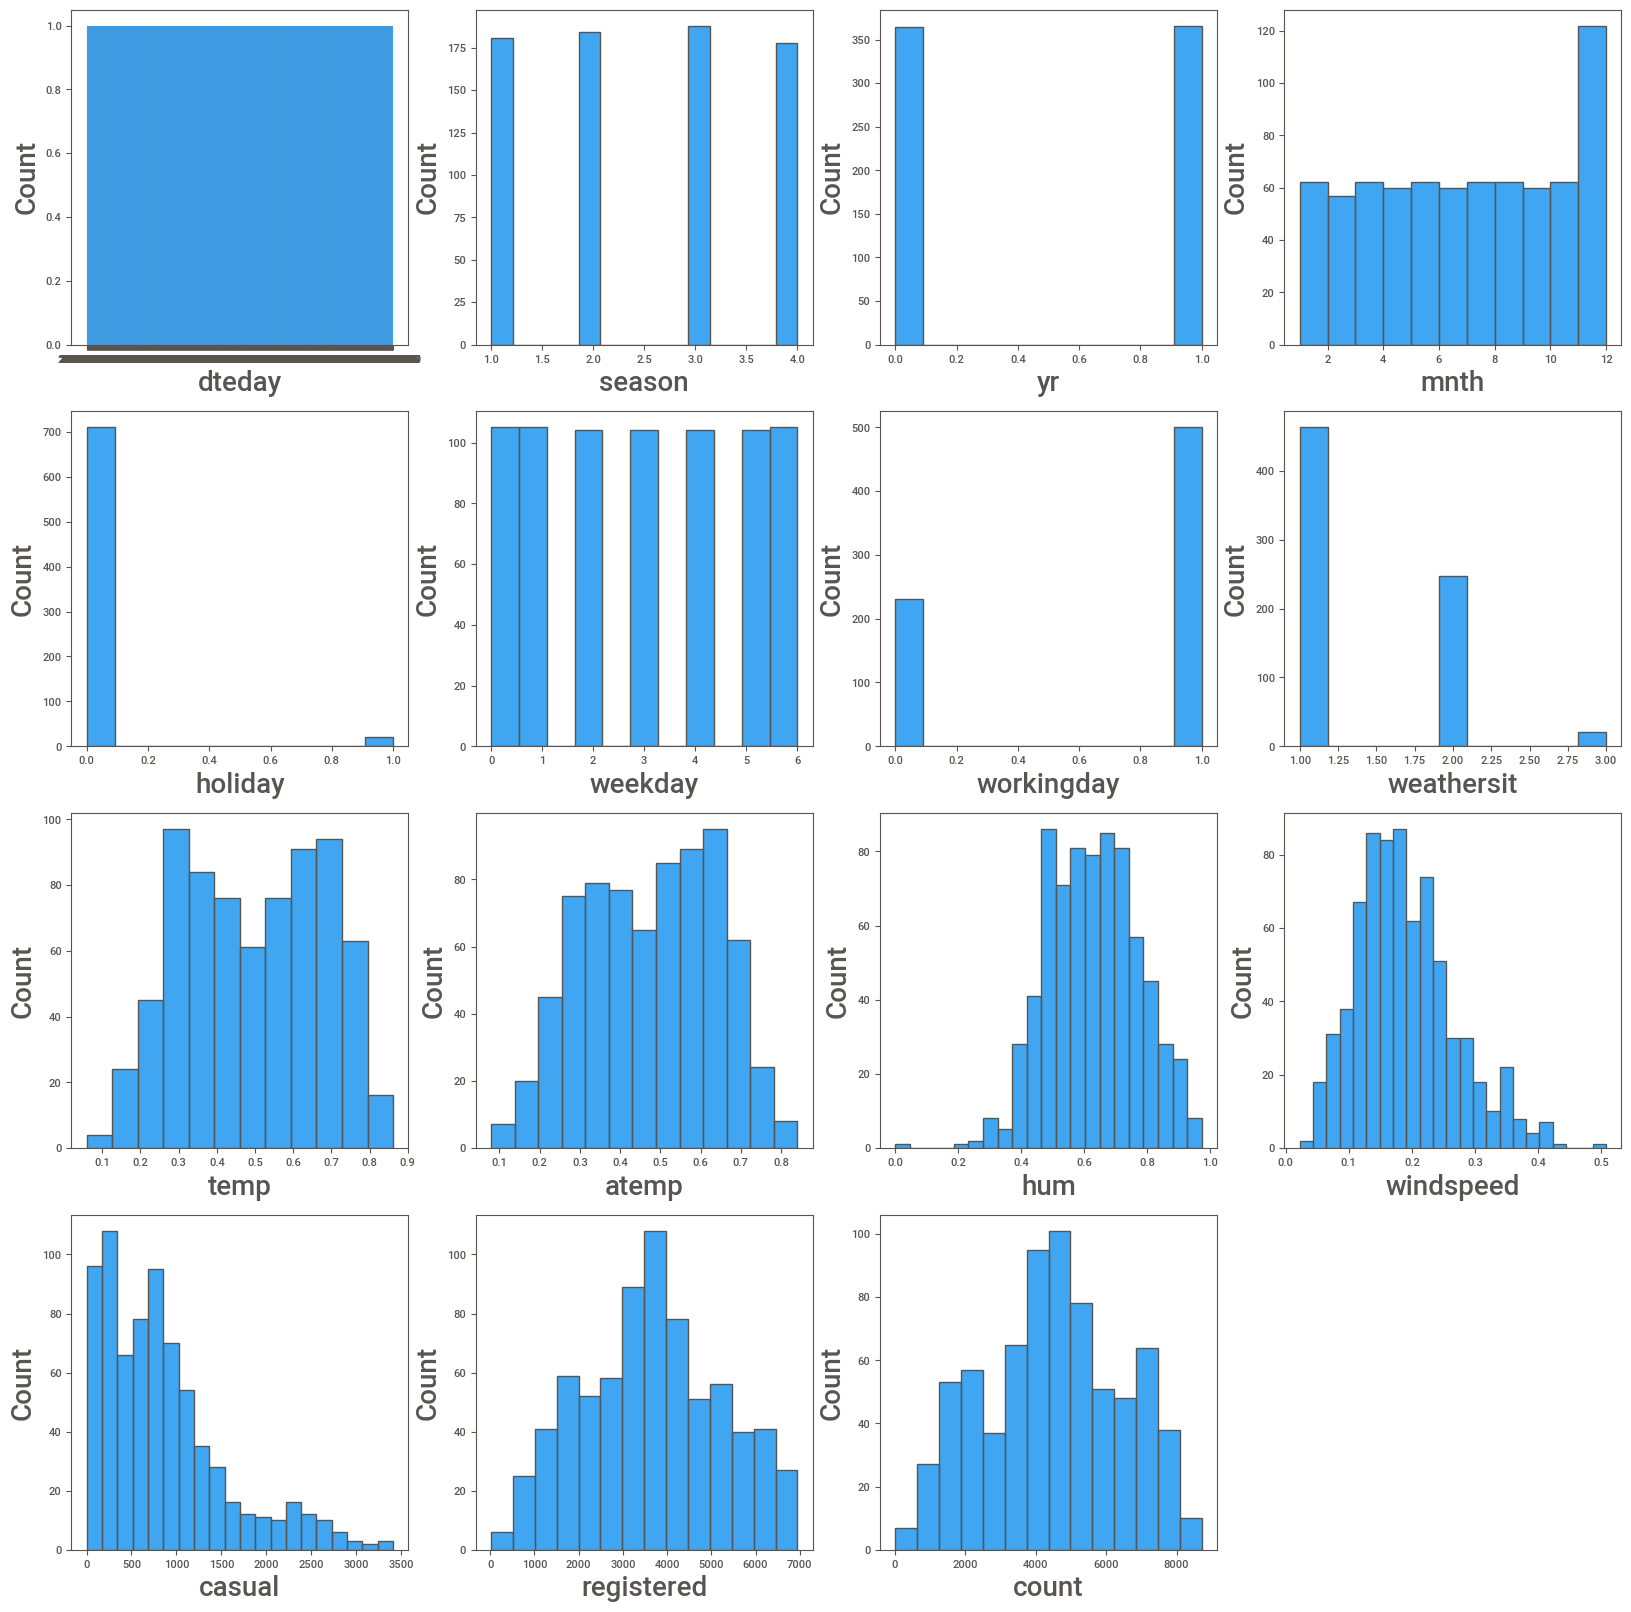

In [6]:
plt.figure(figsize=(20,20))
plotnumber=1    #counter variable
for column in data:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout    

***observation:***

***1)There are no much change of frequencies of season, year and weekday***

***2)The last month have high count compared with all other months***

***3)The count is high on no holiday than on holidays***

***4)The count is high during workingdays compared to non working days***

***5)During clear,partly cloudy weather(1) count is highest And during mist cloudy weather(2) the count gets second highest And followed by third highest during snow,light rain weather(3)***

***6)The count gets increased as the temp gets warmer and goes back to the lowest at highest temp.Also atemp is similar to temp***

***7)The count is lowest at low humidity and gets increased as the humidity increase***

***8)When there is too much wind bike rental is too low***

***9)registered bike rental is higher than casual bike rental***

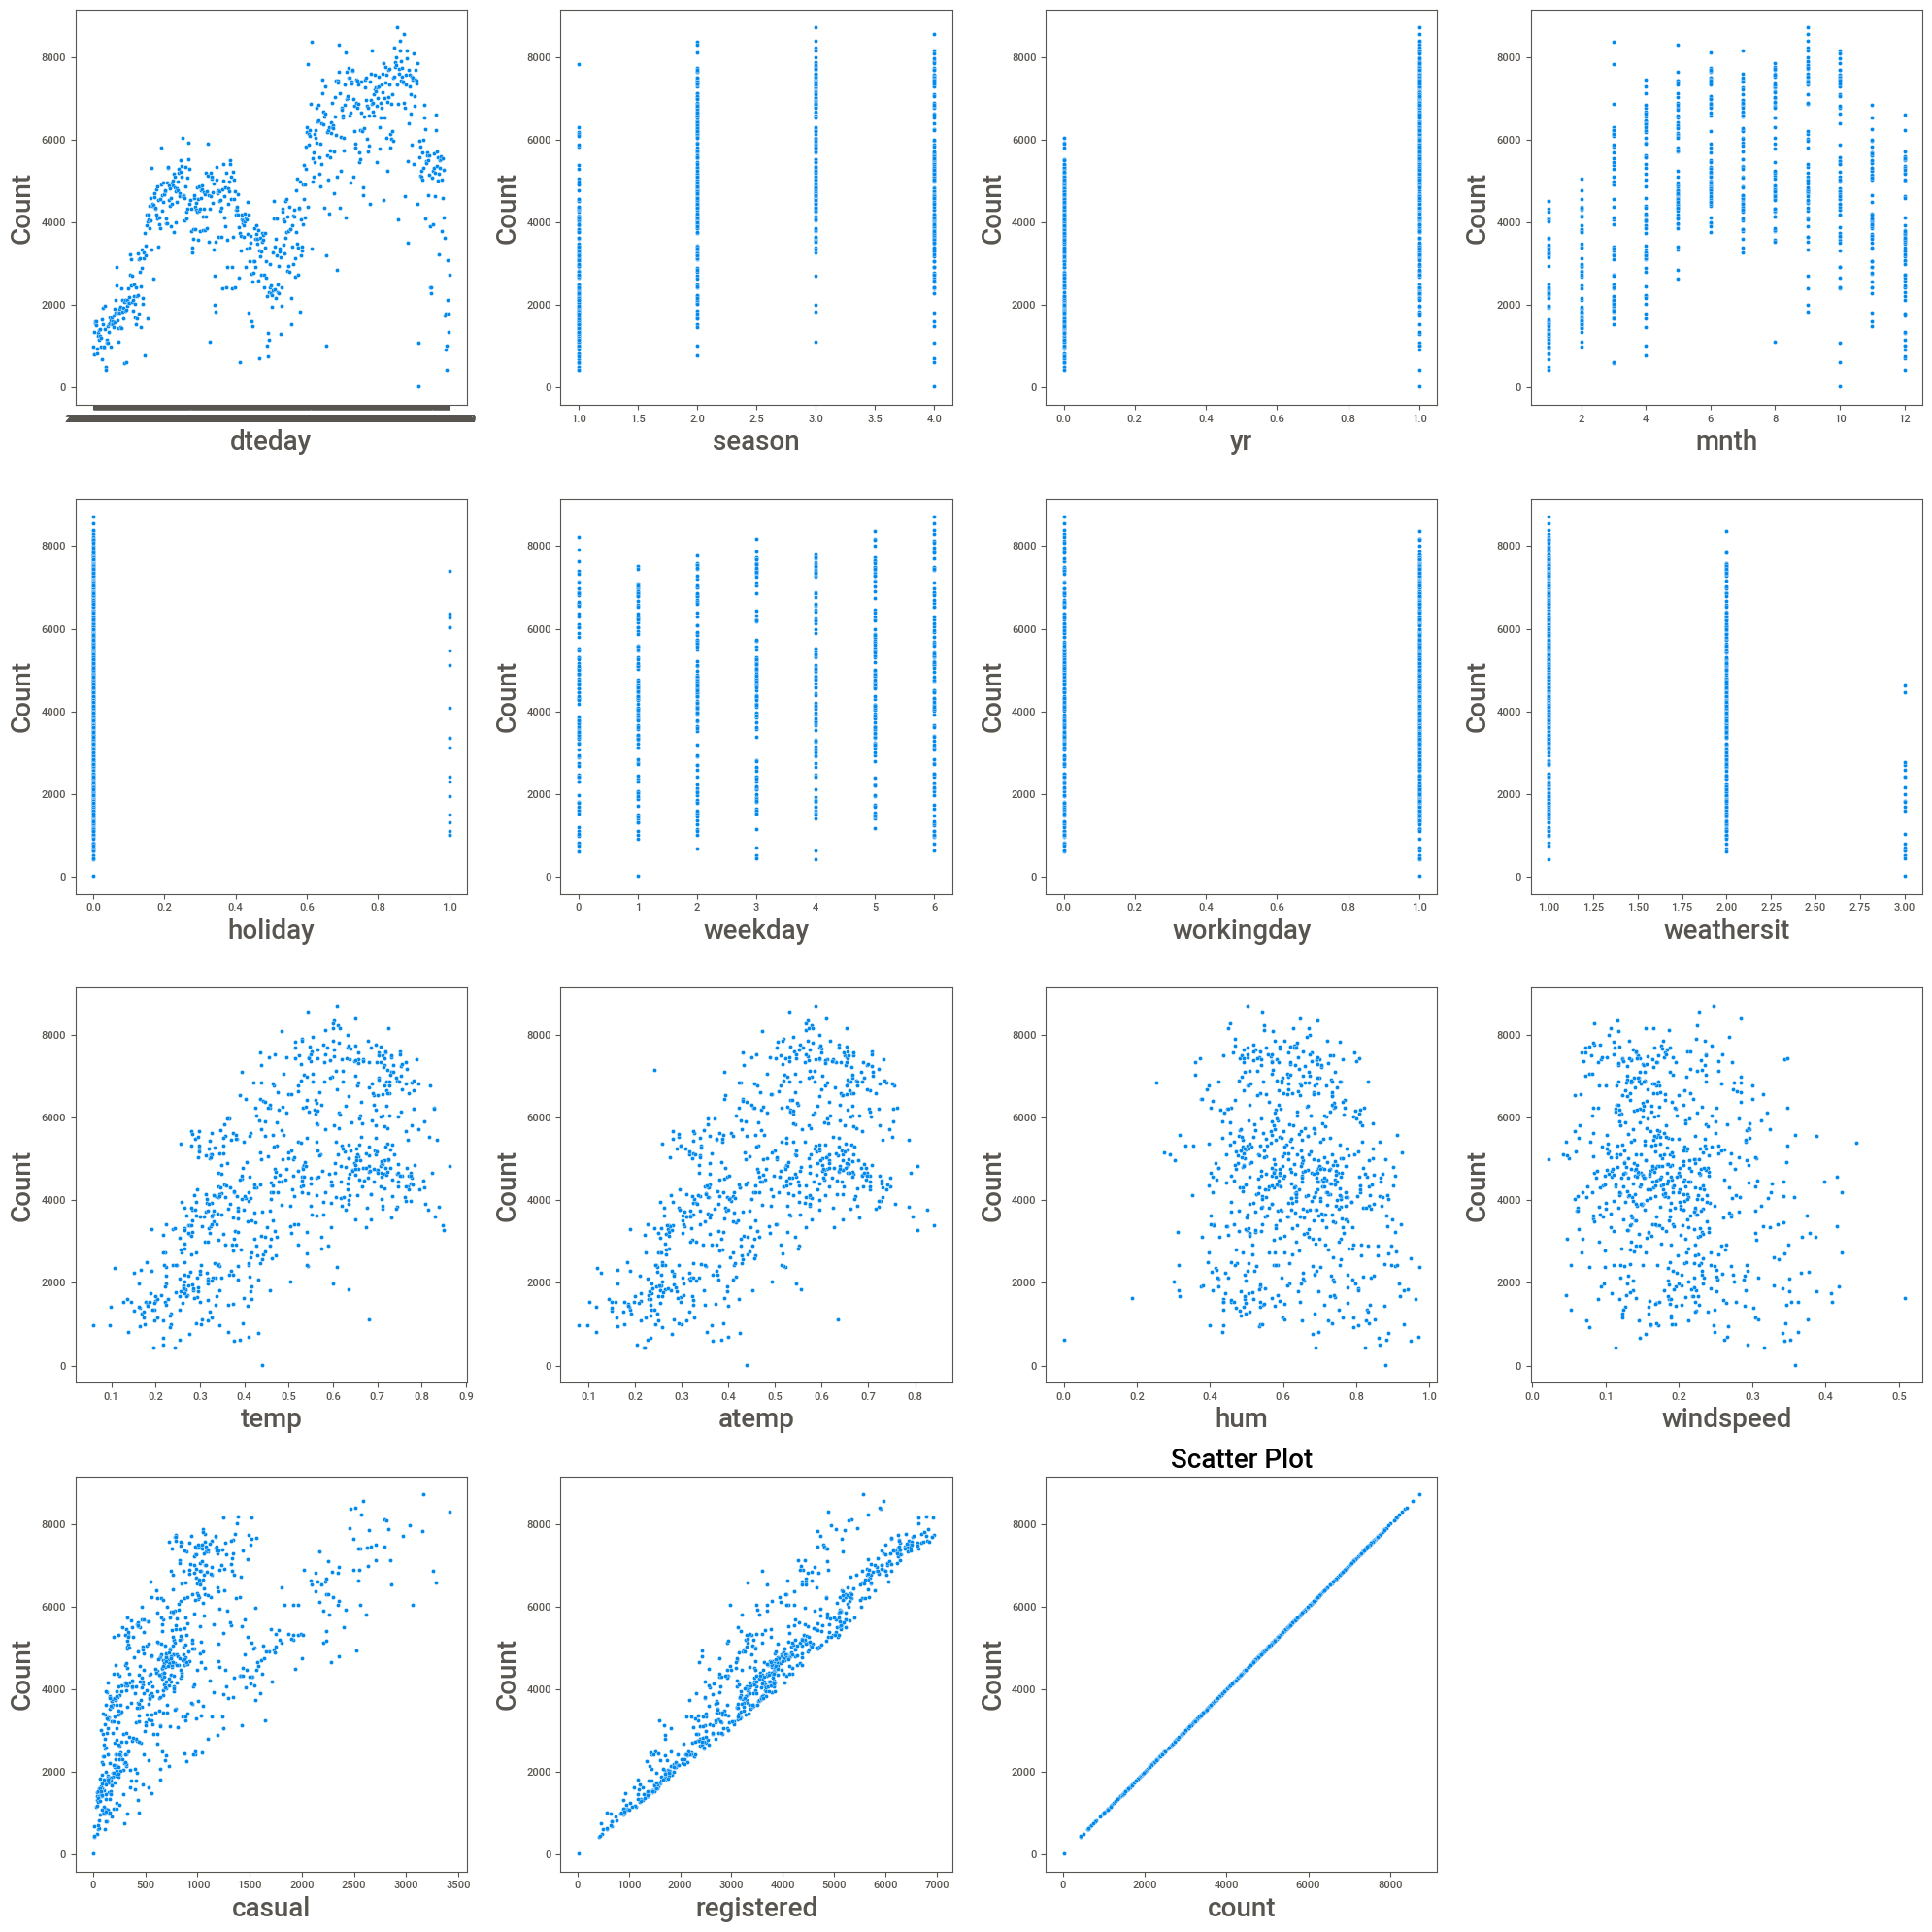

In [7]:
plt.figure(figsize=(20, 20))
plotnumber = 1    # Counter variable

for column in data:
    ax = plt.subplot(4, 4, plotnumber)
    sns.scatterplot(data=data, x=column, y="count")
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plotnumber += 1

plt.title('Scatter Plot', fontsize=20)
plt.tight_layout()
plt.show()

***observation: There is a linear relation between bike rental count and temperature,as warmer the temp is the more bike gets rented
temp and atemp have similar distribution and may present redundancy and even multicollinearity hence we can drop out atemp
The bike rental is lowest at low humidity and gets increased as the humidity increase
When there is too much wind bike rental is too low***

# Data Preprocessing and Feature engineering

***Since there are no missing values we will check with the distribution and outliers of the data.Before that  we will remove unwanted features.Here 'instance' has unique values and 'dteday' is a redundant data which have been already categorized throughout 'season', 'year' and 'month'.***

In [8]:
data=data.drop(['dteday',],axis=1)

***We can also drop 'casual' and 'registered' feature as they will not help us model demand from a single user behaviour***

In [9]:
data=data.drop(['casual','registered'],axis=1)

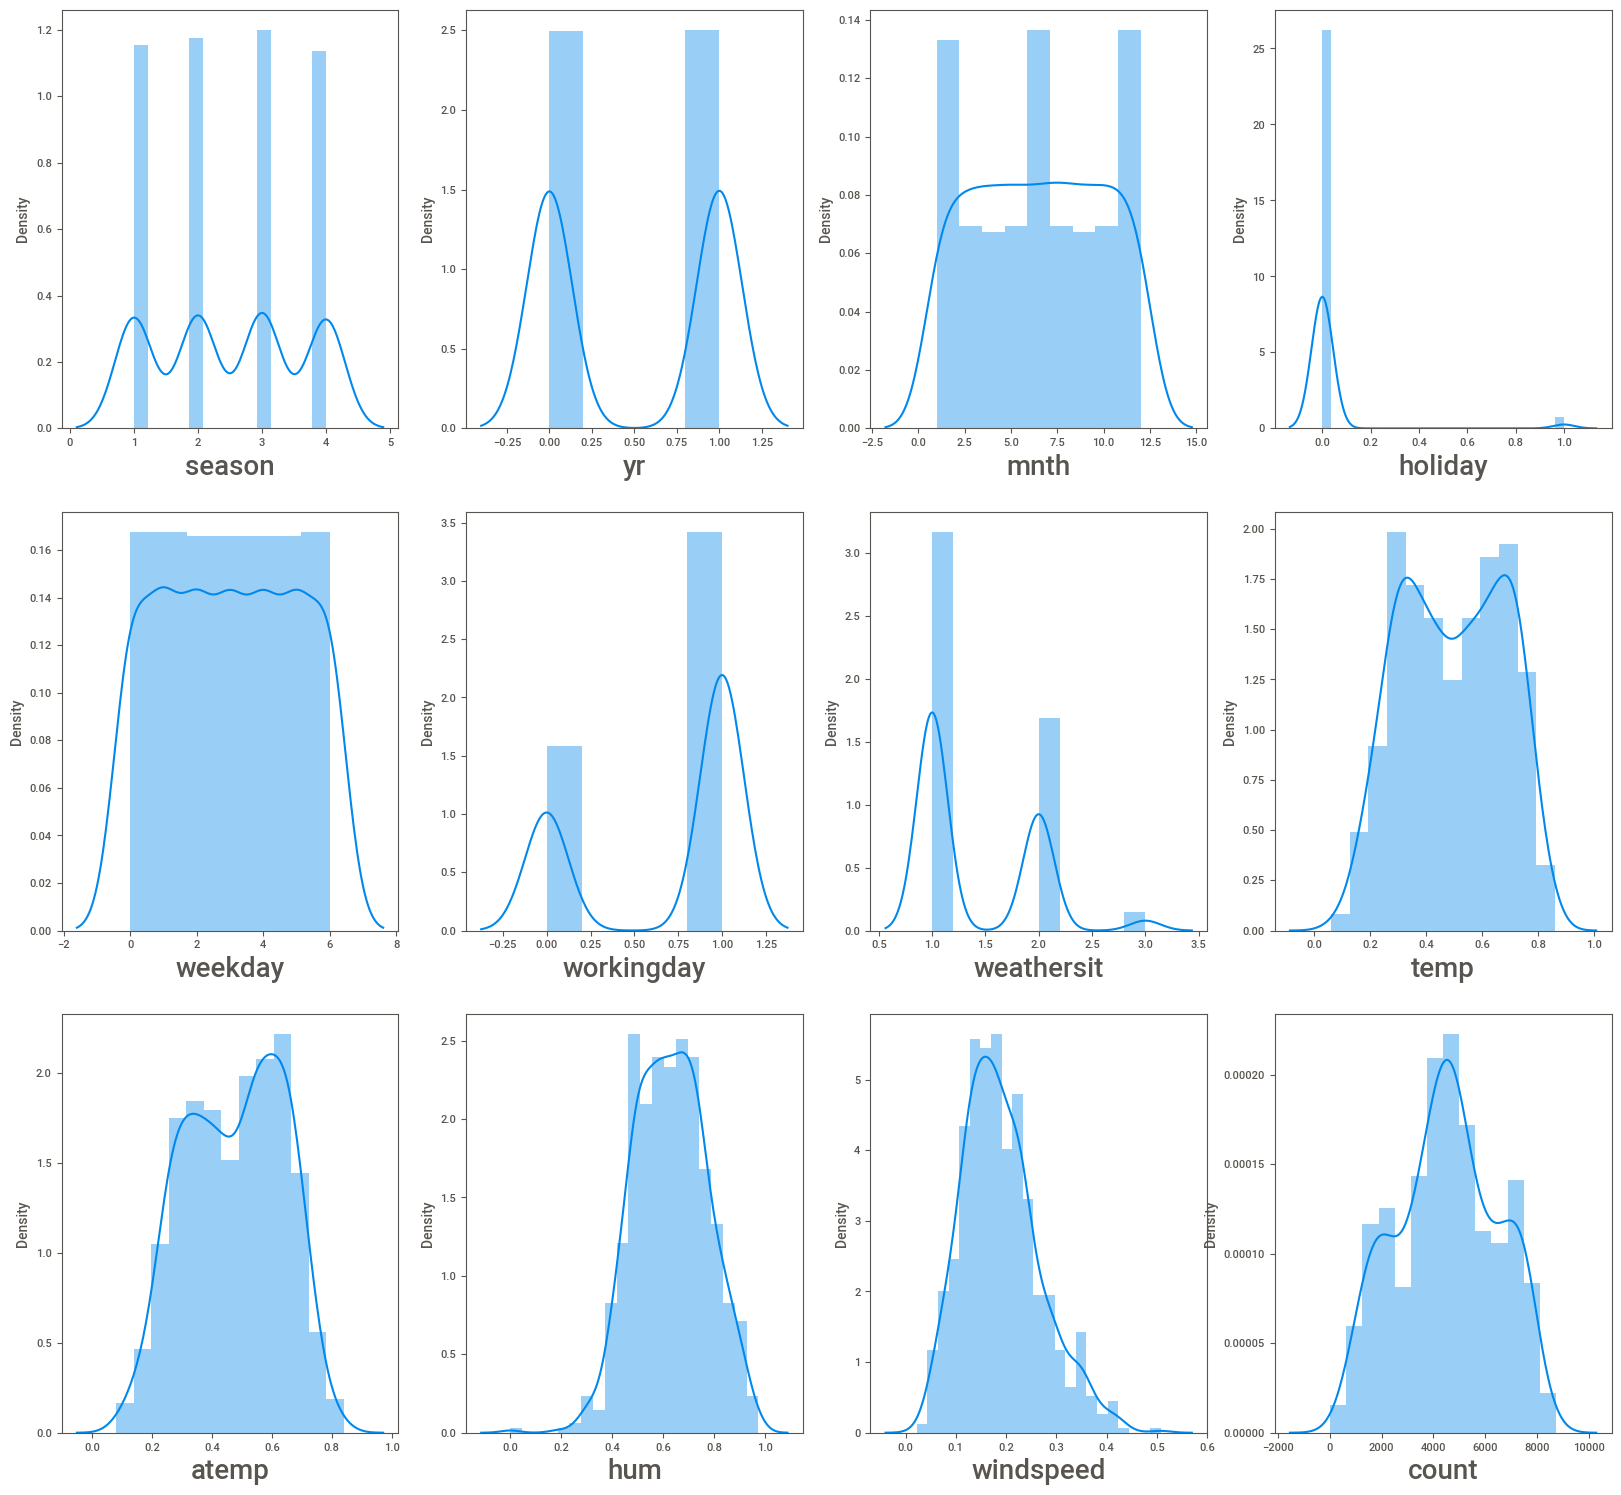

In [19]:
#how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=16 :# as there are 9 columns in the data
        ax = plt.subplot(4,4,plotnumber)# plotting 9 graphs (14-rows,4-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### observation:Since there is no much skewness in the features there is no much imputation needed

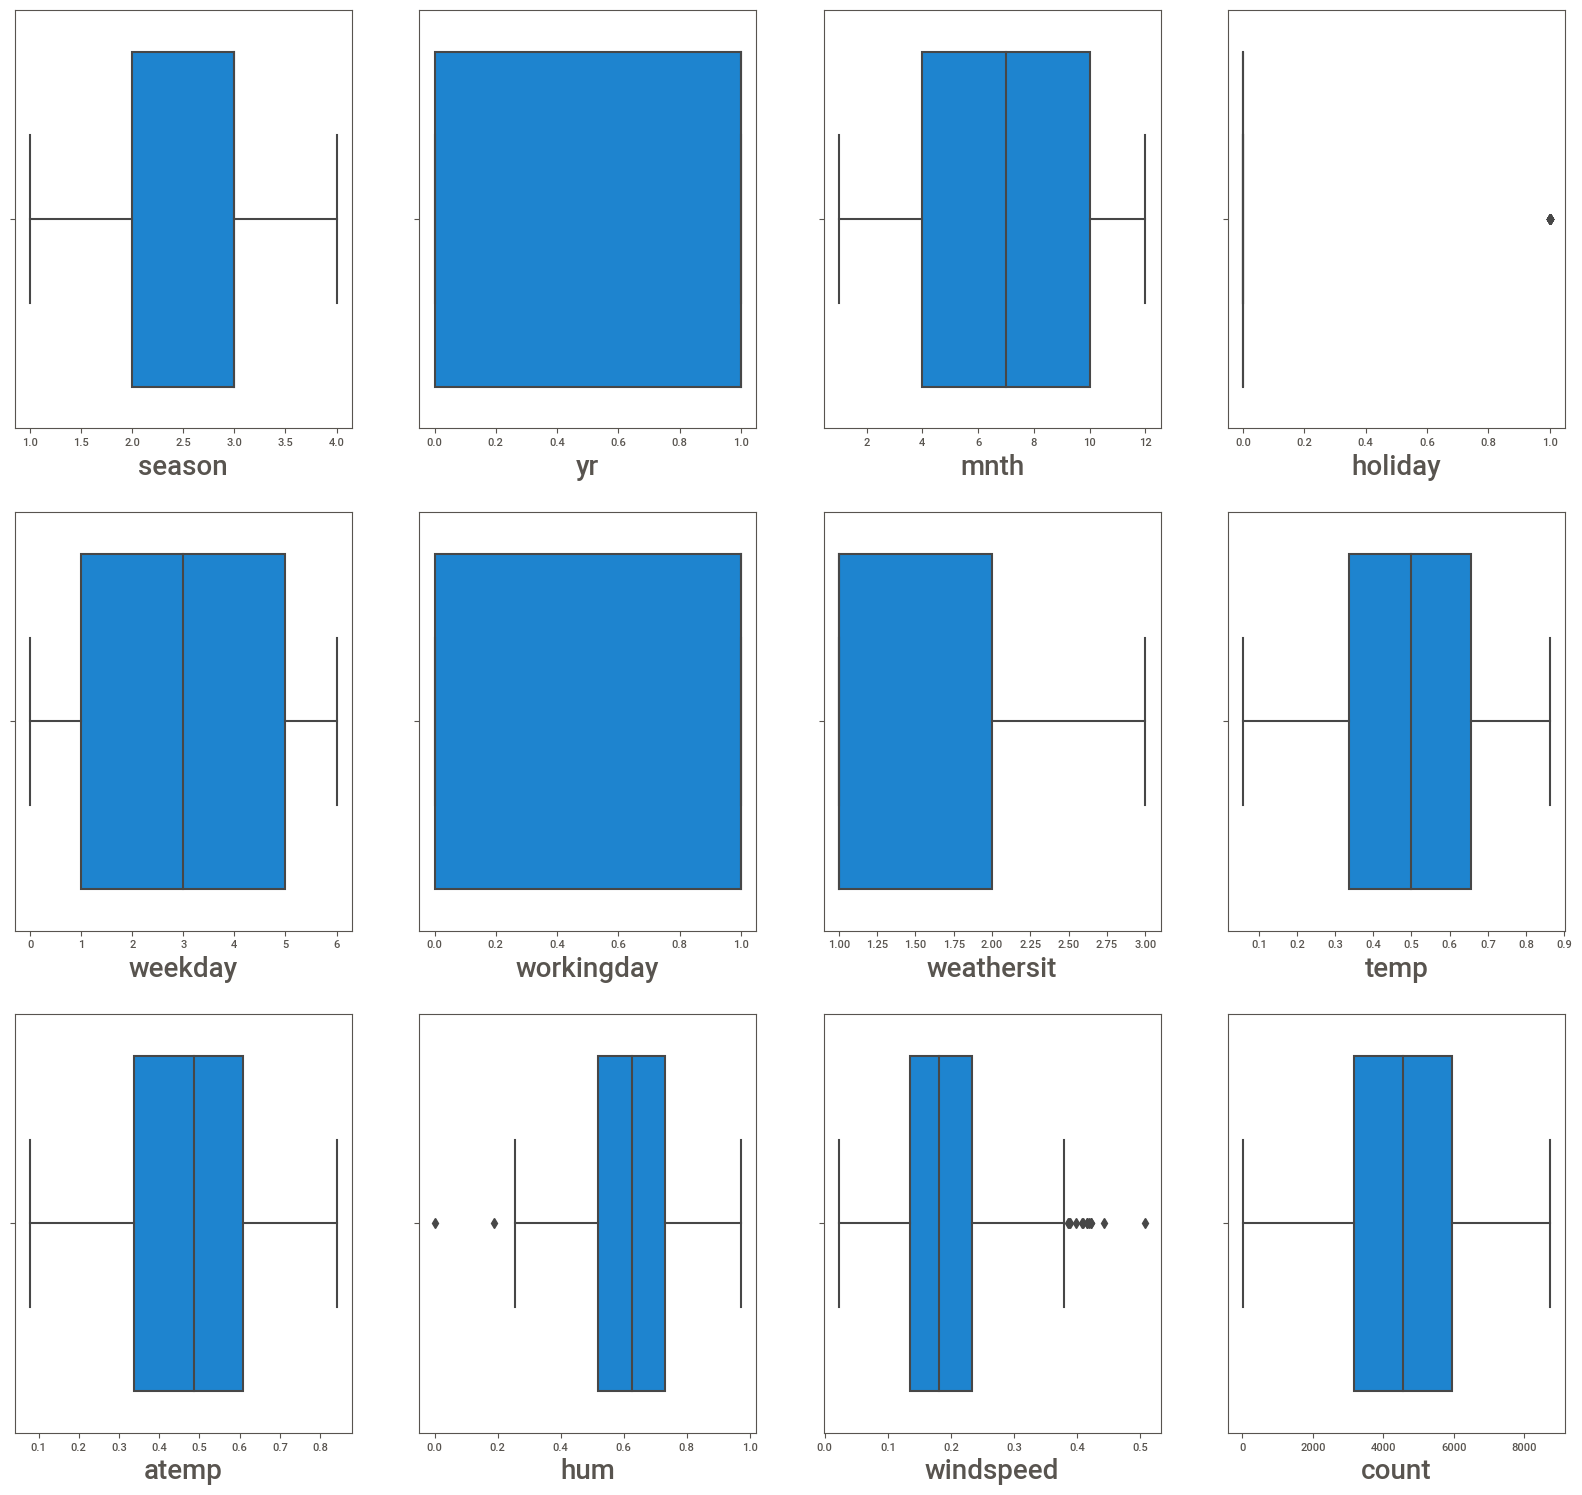

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### Based on the box plots it appears that there are no extreme or unusual values in the dataset there are no outliers present in the given dataset

# Feature Selection

<AxesSubplot:>

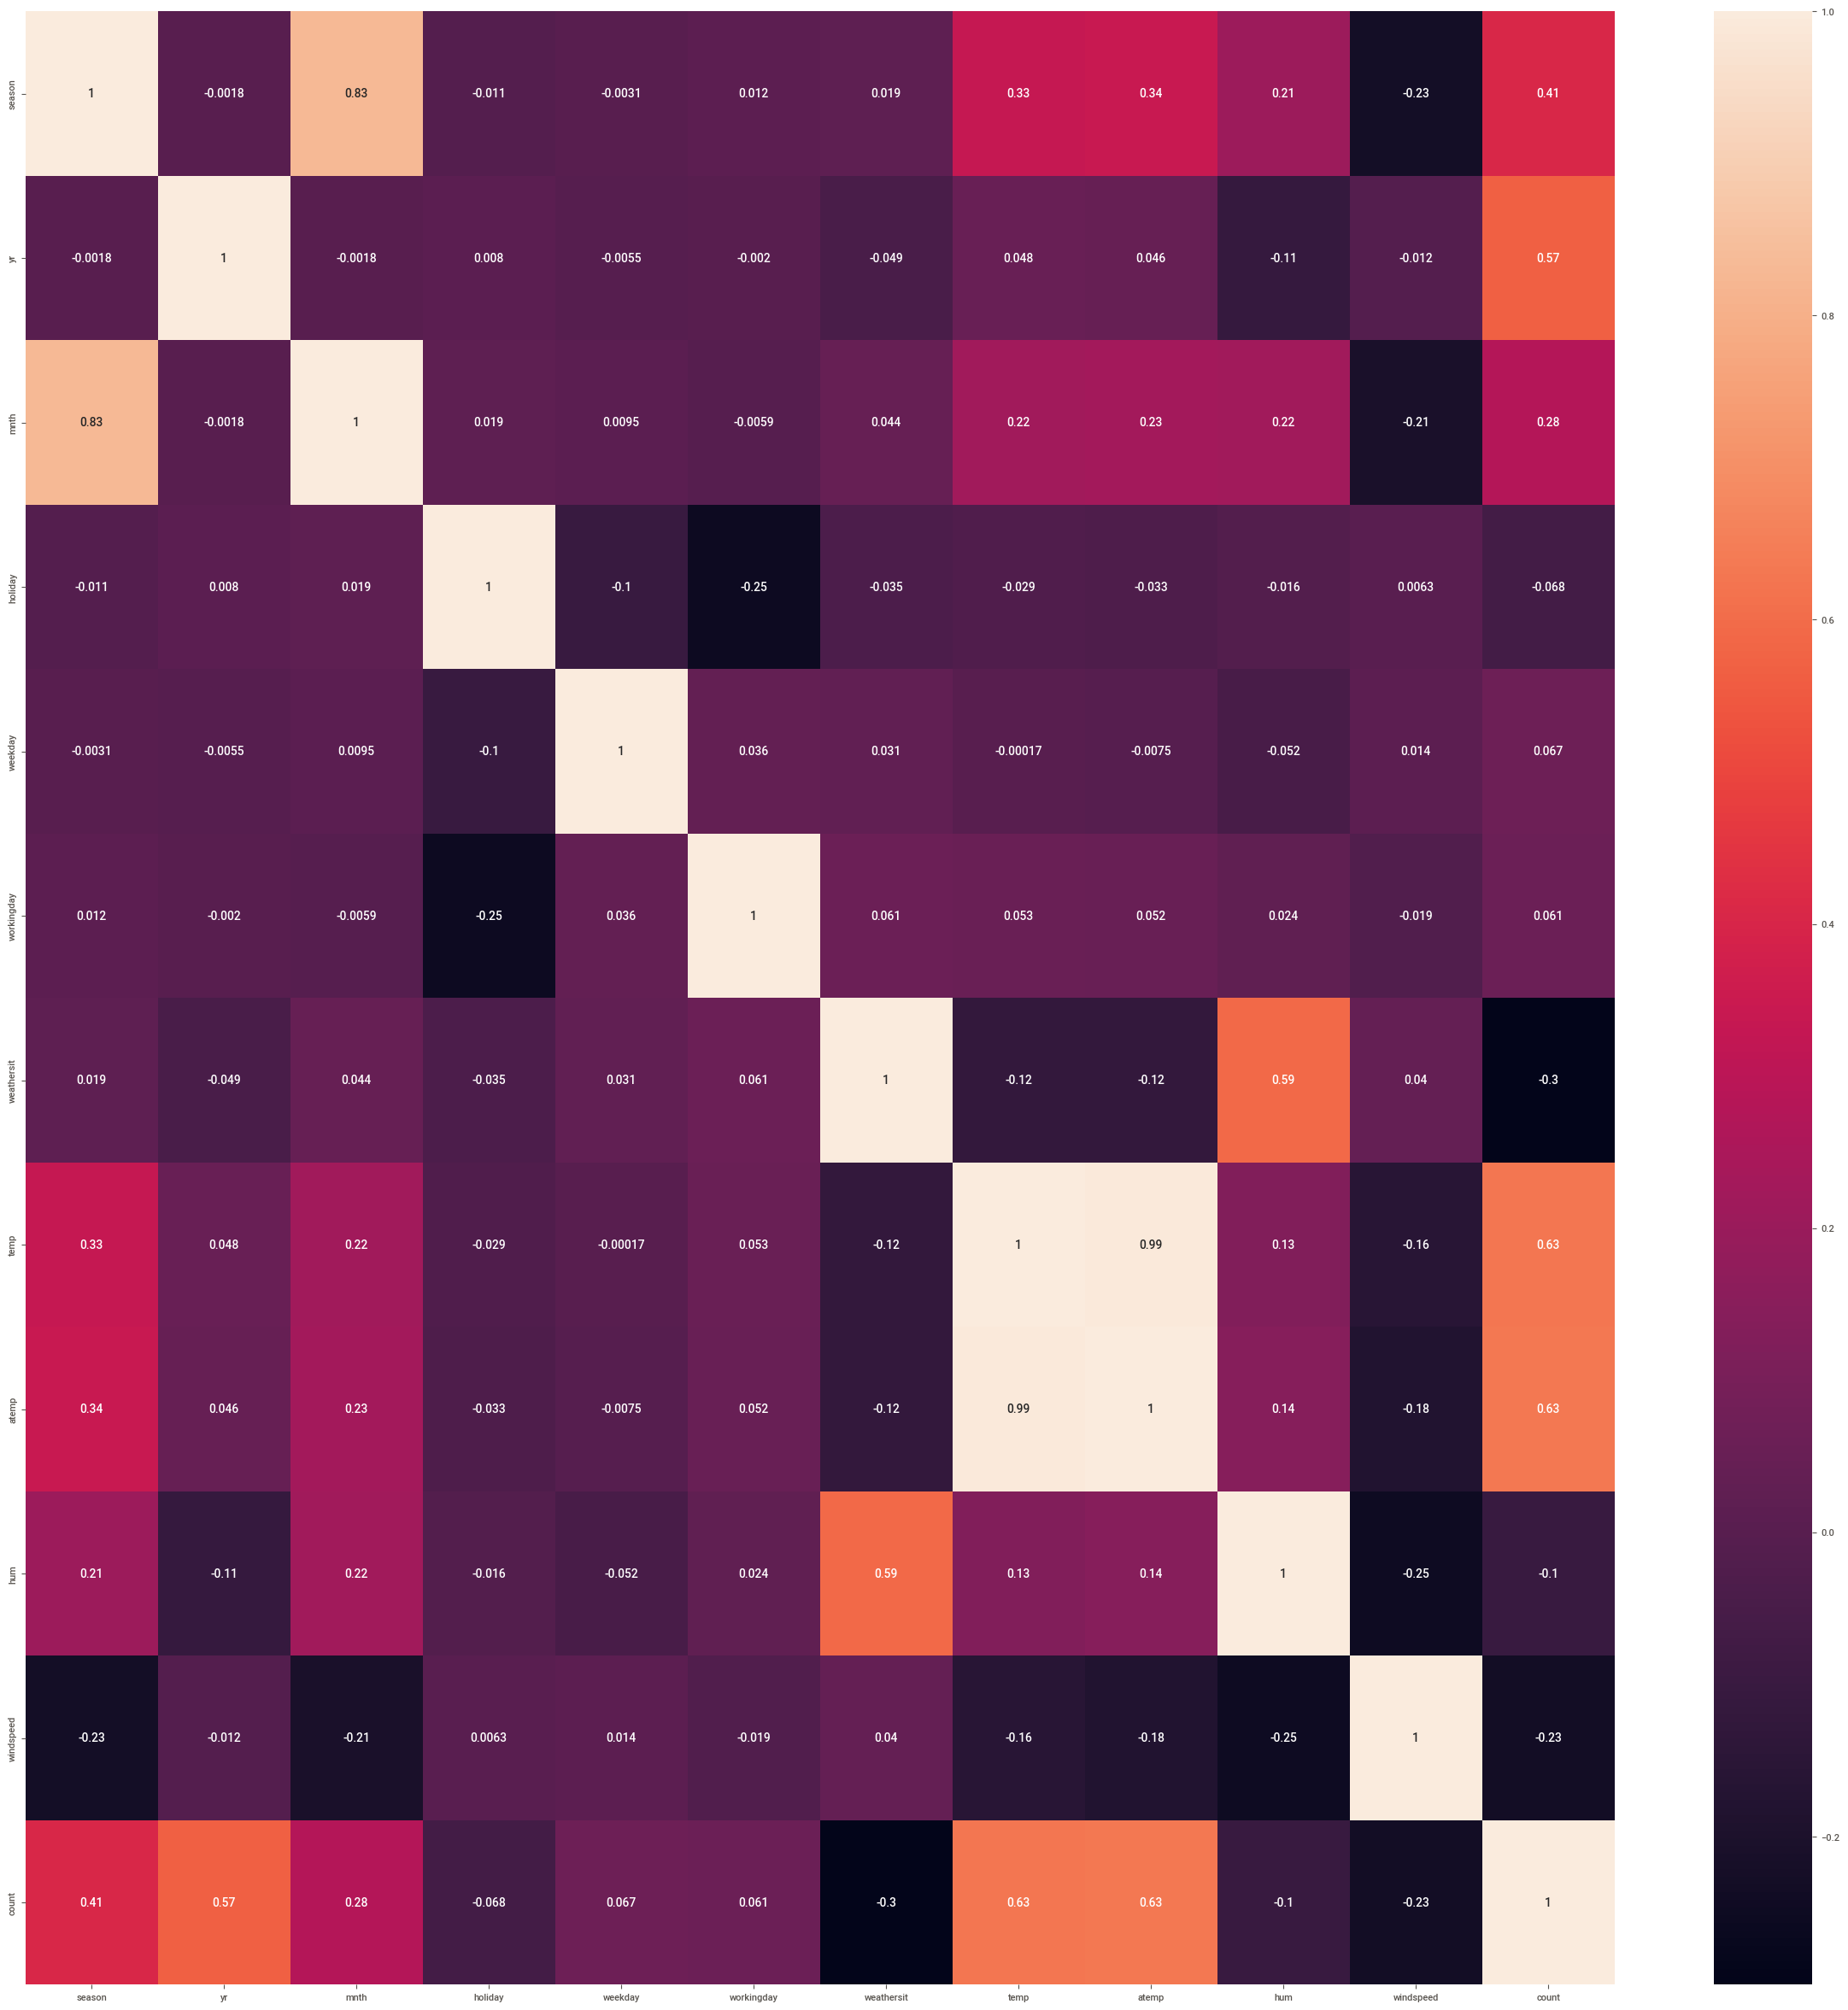

In [21]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(),annot=True)

#### since 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity and has high correlation we can drop the 'atemp' feature

In [10]:
data=data.drop(['atemp'],axis=1)   

<AxesSubplot:>

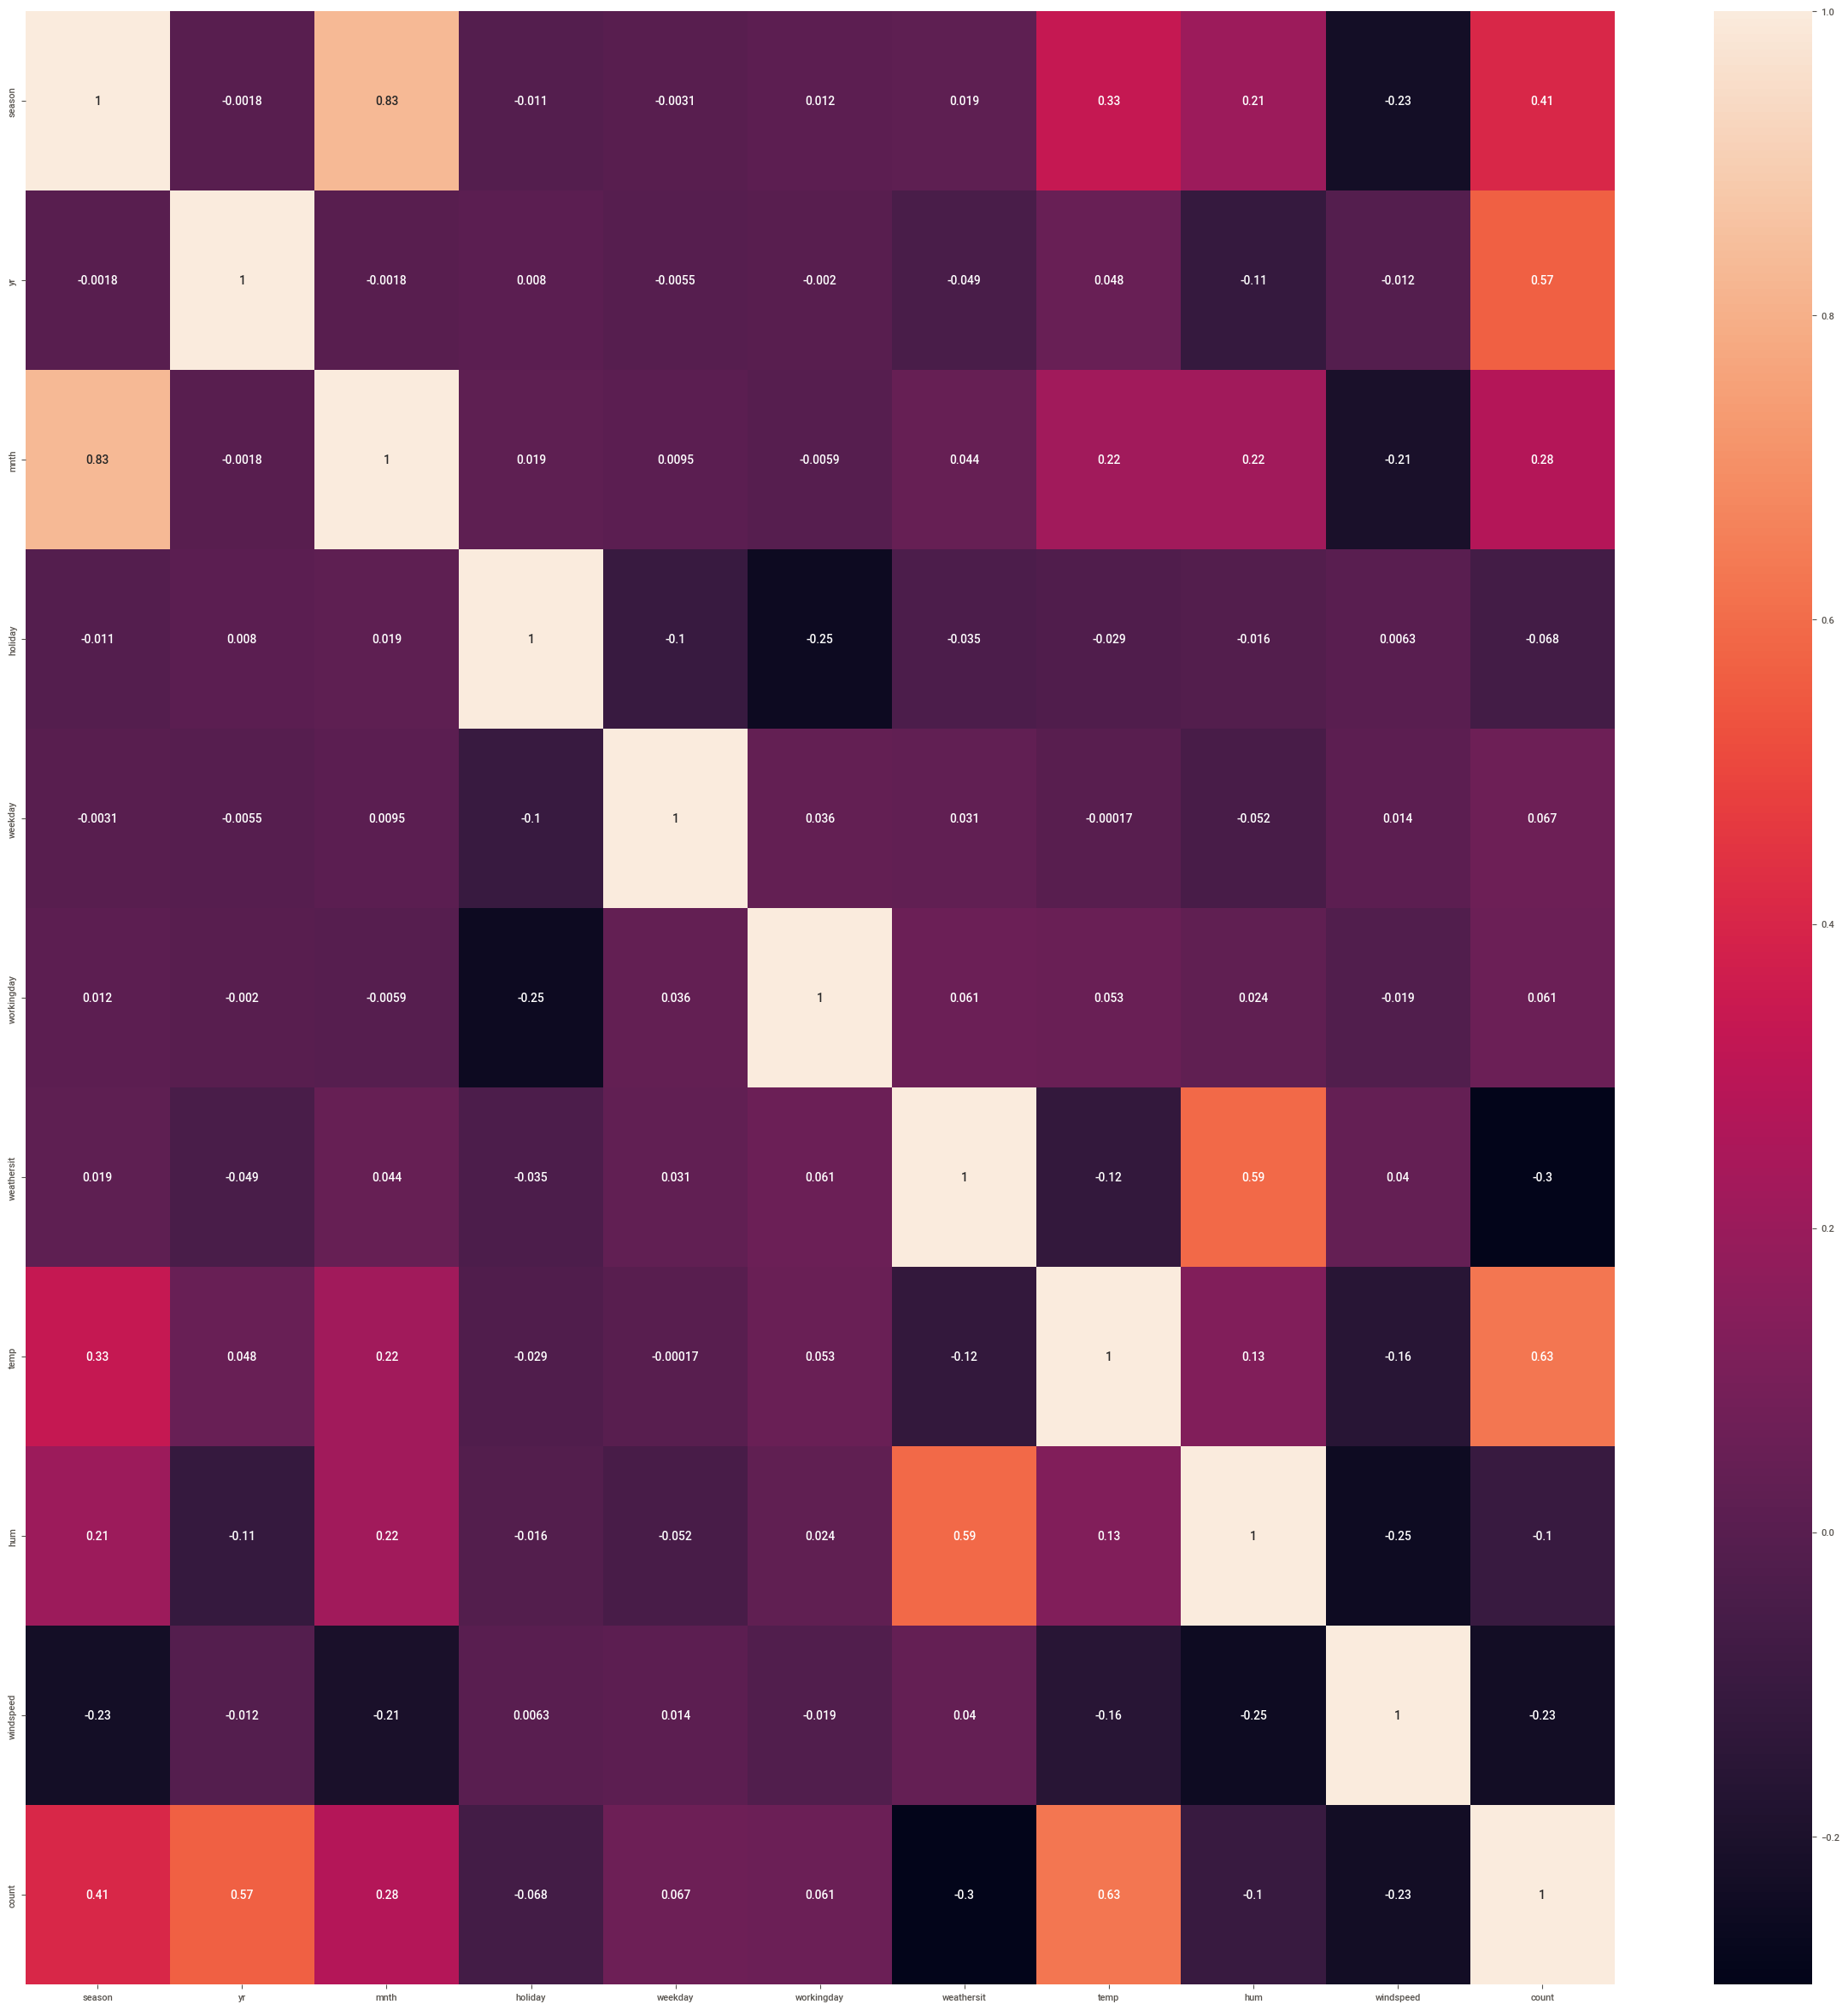

In [24]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(),annot=True)

#### observation:none gives correlation more than 0.90 so no need of any more changes

# Model Creation

## splitting the data into x train and y train

In [11]:
x=data.drop(["count", ], axis=1, )

In [12]:
x

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.483333,0.350754


In [13]:
y=data["count"]

In [14]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y)
#splitting data into train and test

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
#Accuracy of the trained model
lr=model.score(x_train,y_train)
print('Accuracy of the model:',lr)

Accuracy of the model: 0.7871623516138482


##### observation:Accuracy of trained model is 0.78716

In [48]:
y_predict=model.predict(x_test) #prediction

In [17]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [39]:
r2_scores=cross_val_score(model,x_train,y_train,cv=3)
print('R-squared scores:',np.average(r2_scores))

R-squared scores: 0.7724453466284129


In [41]:
predict=cross_val_predict(model,x_train,y_train,cv=3)
predict

array([4680.43342781, 4719.62369624, 2895.32541875, 4776.04808995,
       2921.00165289, 6301.11550526, 2915.82316112, 6760.84397549,
       4138.89707995, 6235.55407887, 4798.60135942, 5958.50459097,
       4949.46516303, 2946.8905458 , -126.3609342 , 5217.45452236,
       6186.18568911, 1233.3164614 , 2753.75018546, 4417.71042646,
       2235.56999479, 5432.86848108, 1955.27915894, 4270.28978856,
       6927.44530315, 5356.58686553, 4040.40914175, 2421.56033954,
       6220.25155164, 4397.76353261, 5446.16985746, 5343.92569025,
       7268.64795577, 1563.76610371, 5493.66738665, 4549.8043869 ,
       6698.95970304, 5418.69408152, 6955.97825989, 7227.62318411,
       1513.59532972, 6361.5064742 , 6575.45768525, 5121.41757358,
       3693.4742671 , 3026.86166475, 3986.97300757, 6173.47844897,
       2981.95832231, 6961.34108733, 1715.29801978, 1460.78717889,
       1444.60889444, 5888.834591  , 3736.6215081 , 4358.24644541,
       1308.57161049, 5245.43336063, 5305.57273419, 5517.07735

#### R-squared and mean squared error score

In [45]:
r2_scores=cross_val_score(model,x_train,y_train,cv=3)
print('R-squared scores:',np.average(r2_scores))

R-squared scores: 0.7724453466284129


****Observation: the r2 score of linear regression after using cross validation is 0.7724****

In [46]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.74)*(183-1)/(183-12-1)
adjusted_r2

0.7216470588235294

In [49]:
from sklearn.metrics import mean_absolute_error
import math
mse=np.square(np.subtract(y_test,y_predict)).mean()
rmse=math.sqrt(mse)
mae=mean_absolute_error(y_test,y_predict)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 803.8278404426846
Mean absolute error : 601.0251947777281


***The RMSE value is 803.83, indicating relatively large prediction errors. The MAE value is 601.03, showing an average prediction error of approximately 601.03 units.***

# Rigid regression

In [51]:
from sklearn.linear_model import Ridge

In [62]:
model2 = Ridge()  # Set the regularization parameter (alpha)
model2.fit(x_train, y_train)


Ridge()

In [64]:
y_pred2 = model2.predict(x_test)
y_pred = model2.predict(x_train)

In [66]:
#Accuracy of the trained model
lr2=model2.score(x_train,y_train)
print('Accuracy of the model:',lr2)

Accuracy of the model: 0.785837699177574


***Accuracy of trained data is 0.78***

In [54]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score1=r2_score(y_test,y_pred2)

In [55]:
r2score1

0.8238860504719467

***r2 score 0.823***

In [56]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.74)*(183-1)/(183-12-1)
adjusted_r2

0.7216470588235294

In [60]:
from sklearn.metrics import mean_absolute_error
import math
mse1=np.square(np.subtract(y_test,y_pred2)).mean()
rmse1=math.sqrt(mse)
mae1=mean_absolute_error(y_test,y_pred2)
print('Root mean square error :',rmse1)
print('Mean absolute error :',mae1)

Root mean square error : 814.3322255561294
Mean absolute error : 607.8440126118699


****Root mean square error : 814.3322255561294
Mean absolute error : 607.8440126118699****

# Lasso Regression

In [68]:
from sklearn.linear_model import Lasso
ls = Lasso()  # Set the regularization parameter (alpha)
ls.fit(x_train, y_train)

Lasso()

In [69]:
y_1 = ls.predict(x_test)
y_11 = ls.predict(x_train)

In [70]:
#Accuracy of the trained model
ls1=ls.score(x_train,y_train)
print('Accuracy of the model:',ls1)

Accuracy of the model: 0.7870512632390174


***Accuracy of trained data is 0.78***

In [71]:
r2=r2_score(y_test,y_1)

In [72]:
r2

0.8276258825309555

***r2 score is 0.82***

In [75]:
from sklearn.metrics import mean_absolute_error
import math
mse2=np.square(np.subtract(y_test,y_1)).mean()
rmse2=math.sqrt(mse)
mae2=mean_absolute_error(y_test,y_1)
print('Root mean square error :',rmse2)
print('Mean absolute error :',mae2)

Root mean square error : 814.3322255561294
Mean absolute error : 601.7033923061534


***Root mean square error : 814.33
Mean absolute error : 601.70***

# Support Vector Regression

In [19]:
from sklearn.svm import SVR

In [20]:
sv = SVR()  # Set the kernel, regularization parameter C, and epsilon
sv.fit(x_train, y_train)


SVR()

In [21]:
y_7= sv.predict(x_test)

In [22]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r8=r2_score(y_test,y_7)

In [26]:
r8 # r2 score

0.01380984042900435

In [27]:
from sklearn.metrics import mean_absolute_error
import math
rmse3 = math.sqrt(metrics.mean_squared_error(y_test,y_7))
print('Root mean square error :',rmse3)
#Mean absolute error
mae3=metrics.mean_absolute_error(y_test,y_7)
print('Mean absolute error :',mae3)

Root mean square error : 2004.5126229008538
Mean absolute error : 1665.2455402368137


# DecisionTreeRegressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
dt = DecisionTreeRegressor()  # Set the maximum depth of the tree
dt.fit(x_train, y_train)


DecisionTreeRegressor()

In [78]:
y_3 = dt.predict(x_test)

In [79]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r3=r2_score(y_test,y_3)

In [80]:
r3

0.7742133367144112

***r2 score is 0.774***

In [81]:
import math
print(mean_squared_error(y_test,y_3))
print(math.sqrt(mean_squared_error(y_test,y_3))) # 

850173.9071038251
922.0487552748093


****Root mean square error : 850173.9071038251
Mean absolute error : 922.0487552748093****

# KNeighborsRegressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
knn = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [31]:
#Accuracy of trained data
knn_score=knn.score(x_train,y_train)
print('Accuracy of model:',knn_score)

Accuracy of model: 0.8352179120449414


***Accuracy of trained data is 0.83***

In [32]:
y_8= knn.predict(x_test)

In [33]:
r2score_knn=r2_score(y_test,y_8)

In [34]:
r2score_knn

0.7621484620307158

***r2 score is 0.7621484620307158***

In [36]:
#Accuracy of test data
rmse_knn=math.sqrt(metrics.mean_squared_error(y_test,y_8))
#Mean absolute error
mae_knn=metrics.mean_absolute_error(y_test,y_8)
print('Root mean square error :',rmse_knn)
print('Mean absolute error :',mae_knn)

Root mean square error : 984.4223043105249
Mean absolute error : 748.5606557377048


***Root mean square error : 984.4223043105249
Mean absolute error : 748.5606557377048***

## RandomForest Regressior

In [39]:
from sklearn.ensemble import RandomForestRegressor
MR=RandomForestRegressor(n_estimators=100)
MR.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
rf_score=MR.score(x_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9820329414358819


***Accuracy of trained data is 0.98***

##### Cross Validation prediction

In [43]:
predict=cross_val_predict(MR,x_train,y_train,cv=3)
predict

array([5041.69, 2659.68, 4498.16, 5147.87, 6949.37, 4823.64, 4468.09,
       2707.14, 4066.25, 2155.72, 5213.27, 4296.56, 4123.98, 2257.23,
       3095.84, 2167.04, 4354.1 , 3474.99, 6768.38, 1630.9 , 1816.6 ,
       3290.75, 4538.73, 6438.31, 1743.83, 7199.79, 3105.2 , 4349.71,
       4965.59, 4188.26, 5619.69, 3624.74, 1347.95, 4737.3 , 4475.66,
       2086.7 , 6786.59, 1551.27, 7935.11, 4503.33, 4294.92, 6618.38,
       6307.44, 6252.01, 6165.11, 7682.8 , 6999.31, 4929.22, 2784.83,
       4483.07, 3685.49, 1746.71, 2078.56, 1917.27, 4852.26, 5513.41,
       5593.8 , 2232.78, 3171.13, 7451.8 , 2860.11, 4597.58, 4910.24,
       2947.21, 3965.83, 4558.33, 2511.46, 7617.16, 3352.31, 7249.8 ,
       2544.55, 4454.94, 3338.29, 3331.18, 6282.91, 6536.53, 5175.48,
       3874.93, 5988.8 , 3082.02, 2810.14, 4222.9 , 3176.55, 6675.3 ,
       6869.18, 4540.4 , 1557.98, 2125.82, 1787.04, 4623.92, 2151.95,
       4570.88, 6362.8 , 3863.13, 3189.57, 4599.74, 1459.21, 4705.05,
       4761.54, 4534

In [44]:
#Accuracy
r2_scores_rt = cross_val_score(MR, x_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores_rt))

R-squared scores : 0.8678369342834049


***Observation:Accuracy after cross validation is 0.867***

In [45]:
rf_pred_rt=MR.predict(x_test)

In [46]:
#Accuracy of test data
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score_rt=r2_score(y_test,rf_pred_rt)
r2score_rt

0.8867007917150015

***r2 score is 0.8867007917150015***

In [47]:
rmse_rt = math.sqrt(metrics.mean_squared_error(y_test,rf_pred_rt))
print('Root mean square error :',rmse_rt)
#Mean absolute error
mae_rt=metrics.mean_absolute_error(y_test,rf_pred_rt)
print('Mean absolute error :',mae_rt)

Root mean square error : 679.4255907135037
Mean absolute error : 466.4847540983606


***Root mean square error : 679.4255907135037
Mean absolute error : 466.4847540983606***

### Final Model for bike rental count

***Observation: When we compare the root mean squared error and mean absolute error for multipple models, the random forest model has less root mean squared error and mean absolute error.Also the accuracy according to r2score is also high for RandomForest. So, finally random forest model is bset for predicting the bike rental count on daily basis.***

## Conclusion

***Predicting bike rental based on environment and seasons deals with the real-life problems that is were the bikes are going to be unused and kept as waste in the docking stations. In this, we predicted the total number of users that are going to be registered by taking the data of one docking station. We have used the regression techniques to solve the issue of unusage of the bike that are present in the docking stations. By using this regression technique, we got the accurate prediction of the users that are going to be registered in the future. In this model, we eliminated the duplicate data and the unwanted data, we cleaned the data, and we used this cleaned data as data points by collecting all these data points, and got a prediction line***

***We fitted Linear regression, Decision Tree and  Random forest model,Rigid regression,KNeighborsRegressor,Support Vector Regression,Lasso Regression and find the accuracy with and without cross validation and find out that accuracy of RandomForest is high and thus used this model for the prediction of bike rental counts***